In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
!pip install opencv-python


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [8]:
data_dir

'.\\datasets\\flower_photos'

In [9]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [10]:
from pathlib import Path

# Point to the parent folder that contains class subfolders
data_dir = Path(r"C:\Users\muham\datasets\flower_photos\flower_photos")

# List all images in the 'roses' folder
roses = list((data_dir / 'roses').glob('*.jpg'))

# Show first 5 images
print(roses[:5])

[WindowsPath('C:/Users/muham/datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('C:/Users/muham/datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('C:/Users/muham/datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('C:/Users/muham/datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('C:/Users/muham/datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]


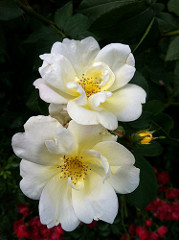

In [11]:
PIL.Image.open(str(roses[0]))

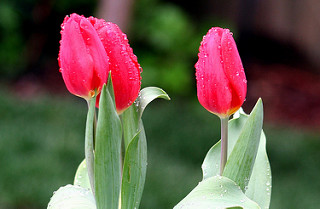

In [12]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [13]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
flowers_images_dict['roses'][0]

WindowsPath('C:/Users/muham/datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [27]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [28]:
y[:5]

[0, 0, 0, 0, 0]

In [30]:
X = np.array(X)
y = np.array(y)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
len(X_train)

2752

In [33]:
len(X_test)

918

In [34]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [35]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 178ms/step - accuracy: 0.4113 - loss: 1.3479
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.6094 - loss: 0.9919
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 188ms/step - accuracy: 0.7122 - loss: 0.7719
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.7627 - loss: 0.6118
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - accuracy: 0.8387 - loss: 0.4342
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.9139 - loss: 0.2484
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 187ms/step - accuracy: 0.9553 - loss: 0.1438
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - accuracy: 0.9727 - loss: 0.0953
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - accuracy: 0.9924 - loss: 0.0359
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.9935 - loss: 0.0326
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - accuracy: 0.9935 - loss: 0.0263
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16

In [36]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6612 - loss: 2.2751


[2.275148868560791, 0.6612200140953064]

In [37]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step  


array([[ -6.5851965 ,  16.927872  , -10.179628  , -10.241228  ,
        -10.519953  ],
       [ 12.494204  ,  -1.8710235 ,  -2.4330993 ,  -3.8862915 ,
         -0.29557127],
       [ -3.5263472 ,   1.180612  ,  13.841423  , -16.090973  ,
         -7.5233564 ],
       ...,
       [  2.0449886 , -10.834115  ,  -7.286285  ,  12.561936  ,
          3.7447302 ],
       [  8.361643  ,  -0.65555227,   4.858033  , -10.0882    ,
         -5.86357   ],
       [ -2.9975357 , -18.064259  ,   1.0402462 ,  14.225036  ,
         13.790784  ]], dtype=float32)

In [38]:
score = tf.nn.softmax(predictions[0])

In [39]:
np.argmax(score)

np.int64(1)

In [40]:
y_test[0]

np.int64(1)

In [43]:
img_height = 180   # you can choose 180, 224, 256 etc.
img_width = 180

In [45]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

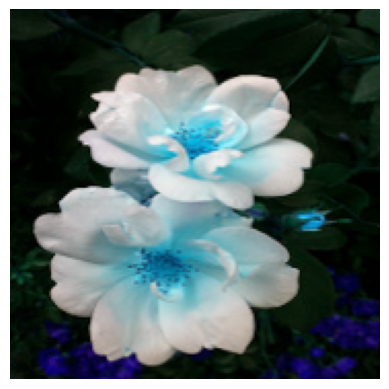

In [46]:
plt.axis('off')
plt.imshow(X[0])

In [50]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[ 2.4183757 ,  7.7230062 ,  2.4614217 ],
        [ 2.946433  ,  8.1994095 ,  3.1406844 ],
        [ 1.2422007 ,  6.6618824 ,  0.948458  ],
        ...,
        [ 6.467902  , 28.492846  , 13.676326  ],
        [ 6.6948423 , 29.069788  , 14.157188  ],
        [ 6.624522  , 28.891014  , 14.008187  ]],

       [[ 2.3661602 ,  7.446886  ,  2.1077132 ],
        [ 2.8429773 ,  7.8586254 ,  2.7807236 ],
        [ 1.3041152 ,  6.5297923 ,  0.6086757 ],
        ...,
        [ 6.4120665 , 28.006985  , 12.900765  ],
        [ 6.908884  , 28.988003  , 13.989223  ],
        [ 6.7549396 , 28.684023  , 13.651952  ]],

       [[ 2.534679  ,  8.338027  ,  3.249259  ],
        [ 3.1768663 ,  8.958461  ,  3.9424477 ],
        [ 1.1042948 ,  6.9560957 ,  1.7052764 ],
        ...,
        [ 6.5922694 , 29.575031  , 15.40378   ],
        [ 6.218095  , 29.25195   , 14.531307  ],
        [ 6.334037  , 29.35206   , 14.801653  ]],

       ...,

     

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))